In [5]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

base = '../setup/data/'
df_datapoints = pd.read_csv(base + 'datapoints.csv', header=0, usecols=[0, 1, 2, 3], names=['datapoint_id', 'value', 'timestamp', 'sensor_id'], parse_dates=[2], infer_datetime_format=True)
df_datatypes = pd.read_csv(base + 'datatypes.csv', header=0, usecols=[0, 1, 2, 3], names=['datatype_id','datatype_name', 'datatype_unit', 'datatype_code'])
df_sensors = pd.read_csv(base + 'sensors.csv', header=0, usecols=[0, 6, 7], names=['sensor_id', 'datatype_id', 'node_id'])
df_nodes = pd.read_csv(base + 'nodes.csv', header=0, usecols=[0, 1], names=['node_id', 'node_name'])

In [6]:
print('df_datapoints dimensions: {}'.format(df_datapoints.shape))
print('df_datatypes dimensions:  {}'.format(df_datatypes.shape))
print('df_sensors dimensions:    {}'.format(df_sensors.shape))
print('df_nodes dimensions:      {}'.format(df_nodes.shape))

df_datapoints dimensions: (176534, 4)
df_datatypes dimensions:  (7, 4)
df_sensors dimensions:    (61, 3)
df_nodes dimensions:      (11, 2)


In [7]:
df_datapoints.head(min(3, df_datapoints['datapoint_id'].unique().shape[0])) # show a tiny amount out of 176,534 rows!

,datapoint_id,value,timestamp,sensor_id
0,764c5e60-8679-11e6-a353-2f6c041e2491,98.000,2016-08-03 04:39:25,7635c920-8679-11e6-a353-2f6c041e2491
1,764c5e61-8679-11e6-a353-2f6c041e2491,33.198,2016-08-03 04:39:25,763b9580-8679-11e6-a353-2f6c041e2491
2,764dbdf0-8679-11e6-a353-2f6c041e2491,29.300,2016-08-03 04:39:25,763ca6f0-8679-11e6-a353-2f6c041e2491


In [8]:
df_datatypes.head(df_datatypes.size)

,datatype_id,datatype_name,datatype_unit,datatype_code
0,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA
1,35dcb3c1-8679-11e6-bda3-ef77801087ee,pressure,pascal,PA
2,35dcb3c2-8679-11e6-bda3-ef77801087ee,humidity,relative humidity,HUMA
3,35dcdad0-8679-11e6-bda3-ef77801087ee,carbon dioxide concentration,ppm,GP_CO2
4,35dcdad1-8679-11e6-bda3-ef77801087ee,hydrogen sulfide concentration,ppm,GP_H2S
5,35dcdad2-8679-11e6-bda3-ef77801087ee,battery,percentage,BAT
6,ed5edee0-e701-11e6-83c1-01ce06e6d17f,RSAM,counts,RSAM


In [9]:
df_sensors.head(min(3, df_sensors.size)) 

,sensor_id,datatype_id,node_id
0,c15a6370-8679-11e6-a353-2f6c041e2491,35dcdad0-8679-11e6-bda3-ef77801087ee,c147ece0-8679-11e6-a353-2f6c041e2491
1,7635c920-8679-11e6-a353-2f6c041e2491,35dcdad2-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491
2,763b9580-8679-11e6-a353-2f6c041e2491,35dcdad1-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491


In [10]:
df_nodes.head(df_nodes.size)

,node_id,node_name
0,c5e39fa0-867a-11e6-a353-2f6c041e2491,N1
1,c147ece0-8679-11e6-a353-2f6c041e2491,N9
2,76309900-8679-11e6-a353-2f6c041e2491,N8
3,762b8ff0-8679-11e6-a353-2f6c041e2491,N10
4,c14ccee0-8679-11e6-a353-2f6c041e2491,N2
5,d3cbc350-8679-11e6-a353-2f6c041e2491,N3
6,762c5340-8679-11e6-a353-2f6c041e2491,N7
7,d3ca3cb0-8679-11e6-a353-2f6c041e2491,N4
8,d3cb7530-8679-11e6-a353-2f6c041e2491,N5
9,ede3ed60-e701-11e6-83c1-01ce06e6d17f,RSAM


In [11]:
# Merge df_sensors and df_datatypes into a larger DataFrame.
_df1 = pd.merge(df_sensors, df_datatypes, on='datatype_id')

In [12]:
# Sanity checks for the presence of nulls from the merge. 

# A surjection will produce 0 'False' or unmatched entries.
print('Matched records from both DataFrames:\n{}'.format(df_sensors['datatype_id'].isin(df_datatypes['datatype_id']).value_counts()))
# No columns should have nulls.
print('\nSummary of null entries in the merged DataFrame:\n{}'.format(_df1.isnull().sum()))
print('\nDimensions of the merged DataFrame: {}'.format(_df1.shape))

Matches across both DataFrames:
True    61
Name: datatype_id, dtype: int64

Summary of null entries in the merged DataFrame:
sensor_id        0
datatype_id      0
node_id          0
datatype_name    0
datatype_unit    0
datatype_code    0
_merge           0
dtype: int64

Dimensions of the merged DataFrame: (61, 7)


In [13]:
_df1.head()

,sensor_id,datatype_id,node_id,datatype_name,datatype_unit,datatype_code,_merge
0,c15a6370-8679-11e6-a353-2f6c041e2491,35dcdad0-8679-11e6-bda3-ef77801087ee,c147ece0-8679-11e6-a353-2f6c041e2491,carbon dioxide concentration,ppm,GP_CO2,both
1,7636da90-8679-11e6-a353-2f6c041e2491,35dcdad0-8679-11e6-bda3-ef77801087ee,762c5340-8679-11e6-a353-2f6c041e2491,carbon dioxide concentration,ppm,GP_CO2,both
2,76427351-8679-11e6-a353-2f6c041e2491,35dcdad0-8679-11e6-bda3-ef77801087ee,76309900-8679-11e6-a353-2f6c041e2491,carbon dioxide concentration,ppm,GP_CO2,both
3,763701a1-8679-11e6-a353-2f6c041e2491,35dcdad0-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,carbon dioxide concentration,ppm,GP_CO2,both
4,c15fbaa0-8679-11e6-a353-2f6c041e2491,35dcdad0-8679-11e6-bda3-ef77801087ee,c14ccee0-8679-11e6-a353-2f6c041e2491,carbon dioxide concentration,ppm,GP_CO2,both


In [14]:
_df2 = pd.merge(_df1, df_datapoints, on='sensor_id')

print('\nUnique sensor entries in the right DataFrame:\n{}'.format(pd.concat([df_datapoints['sensor_id'], df_sensors['sensor_id']]).unique().shape[0]))
print('\nUnique timestamp entries in the right DataFrame:\n{}'.format(df_datapoints['timestamp'].unique().shape[0]))
print('\nMatches across both DataFrames:\n{}'.format(_df1['sensor_id'].isin(df_datapoints['sensor_id']).value_counts()))
print('\nSummary of null entries in the merged DataFrame:\n{}'.format(_df2.isnull().sum()))
print('\nDimensions of the merged DataFrame: {}'.format(_df2.shape))


Unique sensor entries in the right DataFrame:
61

Unique timestamp entries in the right DataFrame:
36278

Matches across both DataFrames:
True    61
Name: sensor_id, dtype: int64

Summary of null entries in the merged DataFrame:
sensor_id             0
datatype_id           0
node_id               0
datatype_name         0
datatype_unit         0
datatype_code         0
datapoint_id          0
value            113078
timestamp             0
_merge                0
dtype: int64

Dimensions of the merged DataFrame: (176534, 10)


In [15]:
_df2.head()

,sensor_id,datatype_id,node_id,datatype_name,datatype_unit,datatype_code,datapoint_id,value,timestamp,_merge
0,c15a6370-8679-11e6-a353-2f6c041e2491,35dcdad0-8679-11e6-bda3-ef77801087ee,c147ece0-8679-11e6-a353-2f6c041e2491,carbon dioxide concentration,ppm,GP_CO2,c17df100-8679-11e6-a353-2f6c041e2491,422.650,2016-08-07 00:51:40,both
1,c15a6370-8679-11e6-a353-2f6c041e2491,35dcdad0-8679-11e6-bda3-ef77801087ee,c147ece0-8679-11e6-a353-2f6c041e2491,carbon dioxide concentration,ppm,GP_CO2,43ccb4c0-867a-11e6-a353-2f6c041e2491,298.581,2016-08-16 01:15:58,both
2,c15a6370-8679-11e6-a353-2f6c041e2491,35dcdad0-8679-11e6-bda3-ef77801087ee,c147ece0-8679-11e6-a353-2f6c041e2491,carbon dioxide concentration,ppm,GP_CO2,fe23ccf0-867a-11e6-a353-2f6c041e2491,222.549,2016-08-17 08:12:12,both
3,c15a6370-8679-11e6-a353-2f6c041e2491,35dcdad0-8679-11e6-bda3-ef77801087ee,c147ece0-8679-11e6-a353-2f6c041e2491,carbon dioxide concentration,ppm,GP_CO2,aa5df5d0-867c-11e6-a353-2f6c041e2491,NaN,2016-08-19 15:41:08,both
4,c15a6370-8679-11e6-a353-2f6c041e2491,35dcdad0-8679-11e6-bda3-ef77801087ee,c147ece0-8679-11e6-a353-2f6c041e2491,carbon dioxide concentration,ppm,GP_CO2,aa384560-867c-11e6-a353-2f6c041e2491,21.196,2016-08-19 08:38:31,both


In [16]:
df = pd.merge(_df2, df_nodes, on='node_id', indicator=True)

print('\nSummary of null entries in the merged DataFrame:\n{}'.format(df.isnull().sum()))
print('\nNull entries in the merged DataFrame:\n{}'.format(df['value'].isnull().sum()))
print('\nNon-null entries in the merged DataFrame:\n{}'.format(df.groupby('sensor_id').agg({'value':'count' })['value'].sum()))
print('\nDimensions of the merged DataFrame: {}'.format(df.shape)) # 63456 + 113078 = 176534


Summary of null entries in the merged DataFrame:
sensor_id             0
datatype_id           0
node_id               0
datatype_name         0
datatype_unit         0
datatype_code         0
datapoint_id          0
value            113078
timestamp             0
node_name             0
_merge                0
dtype: int64

Null entries in the merged DataFrame:
113078

Non-null entries in the merged DataFrame:
63456

Dimensions of the merged DataFrame: (176534, 11)


In [17]:
df = df[df['value'].notnull()]
columns = ['sensor_id', 'datatype_id', 'node_id', 'datapoint_id', '_merge']
for col in columns: 
    if col not in list(df.columns.values):        
        columns.remove(col)
df.drop(columns, axis=1, inplace=True)
df['time'] = df.timestamp.astype(np.int64)
df.shape

(63456, 7)

In [34]:
df.head()

,datatype_name,datatype_unit,datatype_code,value,timestamp,node_name,time,color
0,carbon dioxide concentration,ppm,GP_CO2,422.650,2016-08-07 00:51:40,N9,1470531100000000000,9
1,carbon dioxide concentration,ppm,GP_CO2,298.581,2016-08-16 01:15:58,N9,1471310158000000000,9
2,carbon dioxide concentration,ppm,GP_CO2,222.549,2016-08-17 08:12:12,N9,1471421532000000000,9
4,carbon dioxide concentration,ppm,GP_CO2,21.196,2016-08-19 08:38:31,N9,1471595911000000000,9
6,carbon dioxide concentration,ppm,GP_CO2,21.295,2016-08-19 08:08:32,N9,1471594112000000000,9


In [60]:
df.node_name.unique()[0]


'N9'

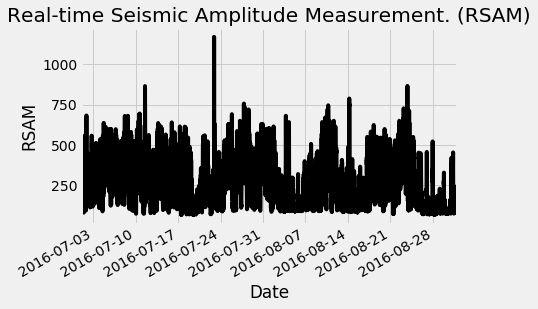

In [126]:
node_names = ['N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10']
df['color'] = np.select([ df.node_name == node_names[0],
                         df.node_name == node_names[1], df.node_name == node_names[2], df.node_name == node_names[3], 
                         df.node_name == node_names[4], df.node_name == node_names[5], df.node_name == node_names[6], 
                         df.node_name == node_names[7], df.node_name == node_names[8], df.node_name == node_names[9]],                         
                         [ 'C' + str(x) for x in xrange(0, 10, 1)], 'Black')
# Plot "RSAM"
def plot_rsam():    
    df_rsam = df.query('datatype_name == "RSAM"')
    name = 'RSAM'
    df_node = df_rsam[df_rsam.node_name == name]
    ax = df_node.plot(kind='line', x='timestamp', y='value', legend=False, c=df_node.color.unique()[0], 
                      title='Real-time Seismic Amplitude Measurement. (RSAM)')
    ax.set_xlabel('Date')
    ax.set_ylabel('RSAM')        

plot_rsam()

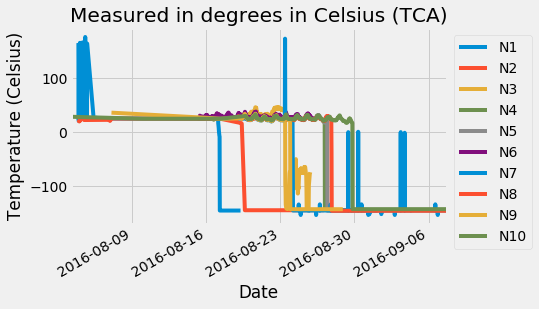

In [157]:
# function to plot the 6 other data types.
def plot_nodes(df_nodes, ylabel, title):    
    node_first = True
    axis = None
    for df_node in df_nodes:
        if df_node.shape[0] == 0:
            continue
        
        if node_first == True:
            node_first = False
            axis = df_node.plot(kind='line', x='timestamp', y='value', c=df_node.color.unique()[0], label=df_node.node_name.unique()[0], title=title)                   
        else:
            df_node.plot(kind='line', x='timestamp', y='value', c=df_node.color.unique()[0], ax=axis, label=df_node.node_name.unique()[0])    
    axis.set_xlabel('Date')
    axis.set_ylabel(ylabel) 
    axis.legend(loc='left', bbox_to_anchor=(1, 1))

# Plot "temperature"        
df_temperature = df.query('datatype_code == "TCA"')
df_nodes = [df_temperature[df_temperature.node_name == name] for name in node_names]
plot_nodes(df_nodes, ylabel='Temperature (Celsius)', title='Measured in degrees in Celsius (TCA)')

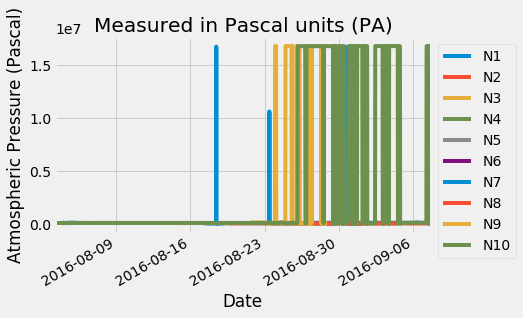

In [148]:
# Plot "pressure"
df_pressure = df.query('datatype_code == "PA"')
df_nodes = [df_pressure[df_pressure.node_name == name] for name in node_names]
plot_nodes(df_nodes, ylabel='Atmospheric Pressure (Pascal)', title='Measured in Pascal units (PA)')

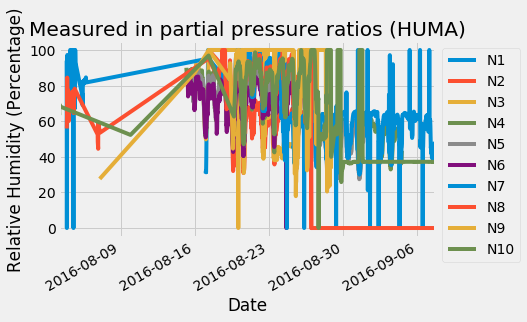

In [151]:
# Plot "humidity"
df_humidity = df.query('datatype_code == "HUMA"')
df_nodes = [df_humidity[df_humidity.node_name == name] for name in node_names]
plot_nodes(df_nodes, ylabel='Relative Humidity (Percentage)', title='Measured in partial pressure ratios (HUMA)')

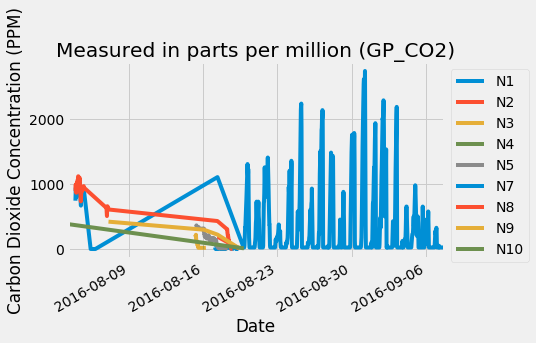

In [153]:
# Plot "carbon dioxide concentration"
df_co2 = df.query('datatype_code == "GP_CO2"')
df_nodes = [df_co2[df_co2.node_name == name] for name in node_names]
plot_nodes(df_nodes, ylabel='Carbon Dioxide Concentration (PPM)', title='Measured in parts per million (GP_CO2)')

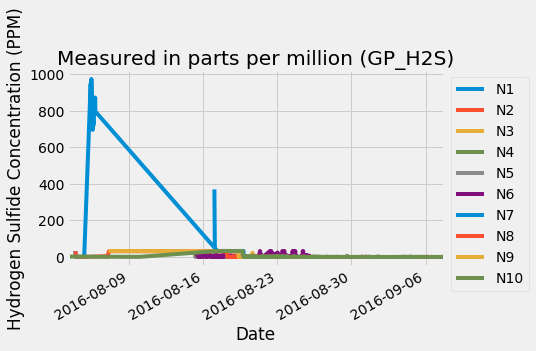

In [155]:
# Plot "hydrogen sulfide concentration"
df_h2s = df.query('datatype_code == "GP_H2S"')
df_nodes = [df_h2s[df_h2s.node_name == name] for name in node_names]
plot_nodes(df_nodes, ylabel='Hydrogen Sulfide Concentration (PPM)', title='Measured in parts per million (GP_H2S)')

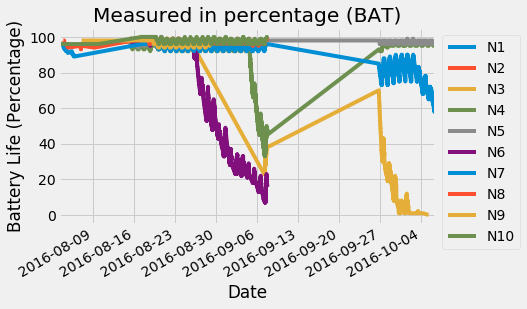

In [158]:
# Plot "battery life"
df_bat = df.query('datatype_code == "BAT"')
df_nodes = [df_bat[df_bat.node_name == name] for name in node_names]
plot_nodes(df_nodes, ylabel='Battery Life (Percentage)', title='Measured in percentage (BAT)')
